In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [299]:
# importing data

In [300]:
data_matches = pd.read_csv(r'C:\Users\sorig\Desktop\PROIECT XG IRONHACK\DATA FOTBAL\soccer-spi\spi_matches.csv')

In [301]:
data_matches.head()

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,2016,2016-07-09,7921,FA Women's Super League,Liverpool Women,Reading,51.56,50.42,0.4389,0.2767,...,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,2016-07-10,7921,FA Women's Super League,Arsenal Women,Notts County Ladies,46.61,54.03,0.3572,0.3608,...,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,2016-07-10,7921,FA Women's Super League,Chelsea FC Women,Birmingham City,59.85,54.64,0.4799,0.2487,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,2016-07-16,7921,FA Women's Super League,Liverpool Women,Notts County Ladies,53.00,52.35,0.4289,0.2699,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,2016-07-17,7921,FA Women's Super League,Chelsea FC Women,Arsenal Women,59.43,60.99,0.4124,0.3157,...,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [302]:
data_matches.shape

(68913, 23)

In [303]:
data_matches_int = pd.read_csv(r'C:\Users\sorig\Desktop\PROIECT XG IRONHACK\DATA FOTBAL\soccer-spi\spi_matches_intl.csv')

In [304]:
data_matches_int.head()

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,2019,2019-01-02,1929,International Match,Thailand,Oman,31.12,37.36,0.3724,0.2706,...,NaN,NaN,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,2019-01-05,1933,AFC Asian Cup,United Arab Emirates,Bahrain,37.82,40.38,0.4055,0.1743,...,NaN,NaN,1.0,1.0,2.29,1.63,0.96,0.59,1.05,1.05
2,2019,2019-01-06,1933,AFC Asian Cup,Australia,Jordan,68.22,42.06,0.6973,0.0633,...,NaN,NaN,0.0,1.0,1.45,0.50,2.59,0.44,0.00,1.05
3,2019,2019-01-06,1933,AFC Asian Cup,Thailand,India,29.21,17.97,0.6167,0.1209,...,NaN,NaN,1.0,4.0,0.80,1.54,0.89,0.83,1.05,3.94
4,2019,2019-01-06,1933,AFC Asian Cup,Syria,Palestine,50.32,30.05,0.6850,0.1061,...,NaN,NaN,0.0,0.0,0.98,0.10,1.08,0.02,0.00,0.00


In [305]:
data_matches_int.shape

(4647, 23)

In [306]:
data_matches_latest = pd.read_csv(r'C:\Users\sorig\Desktop\PROIECT XG IRONHACK\DATA FOTBAL\soccer-spi\spi_matches_latest.csv')

In [307]:
data_matches_latest.head()

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,2019,2019-03-01,1979,Chinese Super League,Shandong Luneng,Guizhou Renhe,48.22,37.83,0.5755,0.1740,...,45.9,22.1,1.0,0.0,1.39,0.26,2.05,0.54,1.05,0.00
1,2019,2019-03-01,1979,Chinese Super League,Shanghai Greenland,Shanghai SIPG,39.81,60.08,0.2387,0.5203,...,25.6,63.4,0.0,4.0,0.57,2.76,0.80,1.50,0.00,3.26
2,2019,2019-03-01,1979,Chinese Super League,Guangzhou Evergrande,Tianjin Quanujian,65.59,39.99,0.7832,0.0673,...,77.1,28.8,3.0,0.0,0.49,0.45,1.05,0.75,3.15,0.00
3,2019,2019-03-01,1979,Chinese Super League,Wuhan Zall,Beijing Guoan,32.25,54.82,0.2276,0.5226,...,35.8,58.9,0.0,1.0,1.12,0.97,1.51,0.94,0.00,1.05
4,2019,2019-03-01,1979,Chinese Super League,Chongqing Lifan,Guangzhou RF,38.24,40.45,0.4403,0.2932,...,26.2,21.3,2.0,2.0,2.77,3.17,1.05,2.08,2.10,2.10


In [308]:
data_matches_latest.shape

(11737, 23)

In [309]:
# checking if the dataframes have the same columns

In [310]:
data_frames = [data_matches, data_matches_int, data_matches_latest]

In [311]:
if all([set(data_frames[0].columns) == set(df.columns) for df in data_frames]):
    print('All have the same columns')
else:
    print('Some have different columns')

All have the same columns


In [312]:
# concatenate the 3 dataframes

In [313]:
data = pd.concat([data_matches, data_matches_int, data_matches_latest], axis=0)

In [314]:
data.head()

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,2016,2016-07-09,7921,FA Women's Super League,Liverpool Women,Reading,51.56,50.42,0.4389,0.2767,...,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,2016-07-10,7921,FA Women's Super League,Arsenal Women,Notts County Ladies,46.61,54.03,0.3572,0.3608,...,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,2016-07-10,7921,FA Women's Super League,Chelsea FC Women,Birmingham City,59.85,54.64,0.4799,0.2487,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,2016-07-16,7921,FA Women's Super League,Liverpool Women,Notts County Ladies,53.00,52.35,0.4289,0.2699,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,2016-07-17,7921,FA Women's Super League,Chelsea FC Women,Arsenal Women,59.43,60.99,0.4124,0.3157,...,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [315]:
data.shape

(85297, 23)

In [316]:
# explore, cleaning and wrangling data

In [317]:
data.isna().sum()

season             0
date               0
league_id          0
league             0
team1              0
team2              0
spi1               0
spi2               0
prob1              0
prob2              0
probtie            0
proj_score1        0
proj_score2        0
importance1    13823
importance2    13823
score1          4199
score2          4199
xg1            41500
xg2            41500
nsxg1          41500
nsxg2          41500
adj_score1     41500
adj_score2     41500
dtype: int64

In [318]:
data=data.dropna(axis=0)

In [319]:
data.shape

(39597, 23)

In [320]:
data.duplicated().value_counts()

False    33949
True      5648
dtype: int64

In [321]:
data = data.drop_duplicates()

In [322]:
data.shape

(33949, 23)

In [323]:
data.head()

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
10,2016,2016-08-12,1843,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,...,32.4,67.7,0.0,1.0,0.97,0.63,0.43,0.45,0.00,1.05
11,2016,2016-08-12,1843,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,...,53.7,22.9,2.0,2.0,2.45,0.77,1.75,0.42,2.10,2.10
12,2016,2016-08-13,2411,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,...,38.1,22.2,2.0,1.0,0.85,2.77,0.17,1.25,2.10,1.05
13,2016,2016-08-13,2411,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,...,31.9,48.0,1.0,1.0,0.73,1.11,0.88,1.81,1.05,1.05
14,2016,2016-08-13,2411,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,...,43.6,34.6,0.0,1.0,1.11,0.68,0.84,1.60,0.00,1.05


In [324]:
data.columns

Index(['season', 'date', 'league_id', 'league', 'team1', 'team2', 'spi1',
       'spi2', 'prob1', 'prob2', 'probtie', 'proj_score1', 'proj_score2',
       'importance1', 'importance2', 'score1', 'score2', 'xg1', 'xg2', 'nsxg1',
       'nsxg2', 'adj_score1', 'adj_score2'],
      dtype='object')

In [325]:
# the names of the columns are already written in lower case with underscore

In [326]:
# checking unique values and data types

In [327]:
data.nunique()

season            8
date           2022
league_id        23
league           23
team1           562
team2           566
spi1           7749
spi2           7736
prob1          7220
prob2          6540
probtie        2519
proj_score1     323
proj_score2     305
importance1    1001
importance2     999
score1           11
score2           11
xg1             542
xg2             476
nsxg1           471
nsxg2           404
adj_score1      512
adj_score2      430
dtype: int64

In [328]:
data.dtypes

season           int64
date            object
league_id        int64
league          object
team1           object
team2           object
spi1           float64
spi2           float64
prob1          float64
prob2          float64
probtie        float64
proj_score1    float64
proj_score2    float64
importance1    float64
importance2    float64
score1         float64
score2         float64
xg1            float64
xg2            float64
nsxg1          float64
nsxg2          float64
adj_score1     float64
adj_score2     float64
dtype: object

In [329]:
data['date'].unique()

array(['2016-08-12', '2016-08-13', '2016-08-14', ..., '2023-06-13',
       '2022-12-13', '2022-12-14'], dtype=object)

In [330]:
# converting the score1 amd score2 to integers

In [331]:
data = data.astype({'score1':'int', 'score2':'int'})

In [332]:
data.dtypes

season           int64
date            object
league_id        int64
league          object
team1           object
team2           object
spi1           float64
spi2           float64
prob1          float64
prob2          float64
probtie        float64
proj_score1    float64
proj_score2    float64
importance1    float64
importance2    float64
score1           int32
score2           int32
xg1            float64
xg2            float64
nsxg1          float64
nsxg2          float64
adj_score1     float64
adj_score2     float64
dtype: object

In [333]:
data.head()

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
10,2016,2016-08-12,1843,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,...,32.4,67.7,0,1,0.97,0.63,0.43,0.45,0.00,1.05
11,2016,2016-08-12,1843,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,...,53.7,22.9,2,2,2.45,0.77,1.75,0.42,2.10,2.10
12,2016,2016-08-13,2411,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,...,38.1,22.2,2,1,0.85,2.77,0.17,1.25,2.10,1.05
13,2016,2016-08-13,2411,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,...,31.9,48.0,1,1,0.73,1.11,0.88,1.81,1.05,1.05
14,2016,2016-08-13,2411,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,...,43.6,34.6,0,1,1.11,0.68,0.84,1.60,0.00,1.05


In [334]:
data['league'].unique()

array(['French Ligue 1', 'Barclays Premier League',
       'Spanish Primera Division', 'Italy Serie A', 'German Bundesliga',
       'Major League Soccer', 'Brasileiro Série A',
       'Mexican Primera Division Torneo Apertura',
       'Argentina Primera Division', 'UEFA Champions League',
       'UEFA Europa League', 'English League Championship',
       'Portuguese Liga', 'Mexican Primera Division Torneo Clausura',
       'German 2. Bundesliga', 'Chinese Super League', 'Italy Serie B',
       'Australian A-League', 'Dutch Eredivisie', 'United Soccer League',
       'Spanish Segunda Division', 'UEFA Europa Conference League',
       'FIFA World Cup'], dtype=object)

In [336]:
data.describe() . T

,count,mean,std,min,25%,50%,75%,max
season,33949.0,2019.635836,1.872000,2016.0000,2018.0000,2020.0000,2021.0000,2023.0000
league_id,33949.0,2233.325488,1066.282692,1818.0000,1849.0000,1871.0000,2160.0000,10281.0000
spi1,33949.0,52.159156,18.155398,4.1300,38.9900,51.1600,65.7200,96.5700
spi2,33949.0,52.073652,18.166519,3.9200,38.9200,51.0300,65.6900,96.6900
prob1,33949.0,0.446613,0.155115,0.0270,0.3498,0.4383,0.5347,0.9775
prob2,33949.0,0.300934,0.140936,0.0037,0.2093,0.2855,0.3725,0.8918
probtie,33949.0,0.252453,0.046629,0.0000,0.2365,0.2620,0.2809,0.3671
proj_score1,33949.0,1.500536,0.407943,0.2400,1.2400,1.4400,1.7000,4.0300
proj_score2,33949.0,1.161977,0.401787,0.2000,0.9100,1.1100,1.3600,3.5700
importance1,33949.0,32.580432,26.876058,0.0000,12.1000,26.7000,47.0000,100.0000


In [337]:
data['xg1'].idxmax()

25000

In [338]:
data.loc[[25000]]

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
25000,2019,2019-09-21,2411,Barclays Premier League,Manchester City,Watford,94.87,68.34,0.892,0.0273,...,70.3,29.7,8,0,7.07,0.28,3.82,0.66,8.03,0.0


In [339]:
data['xg1'].idxmin()

1920

In [340]:
data.loc[[1920]]

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
1920,2016,2017-04-16,1843,French Ligue 1,Bastia,Lyon,42.89,74.38,0.1358,0.6575,...,43.7,0.8,0,1,0.0,1.0,0.0,1.0,0.0,1.05


In [341]:
# split into numeric and categorical

In [342]:
data_num  = data.select_dtypes(include = np.number)
data_cat  = data.select_dtypes(include = object)

In [343]:
data_num.columns

Index(['season', 'league_id', 'spi1', 'spi2', 'prob1', 'prob2', 'probtie',
       'proj_score1', 'proj_score2', 'importance1', 'importance2', 'score1',
       'score2', 'xg1', 'xg2', 'nsxg1', 'nsxg2', 'adj_score1', 'adj_score2'],
      dtype='object')

In [344]:
data_cat.columns

Index(['date', 'league', 'team1', 'team2'], dtype='object')

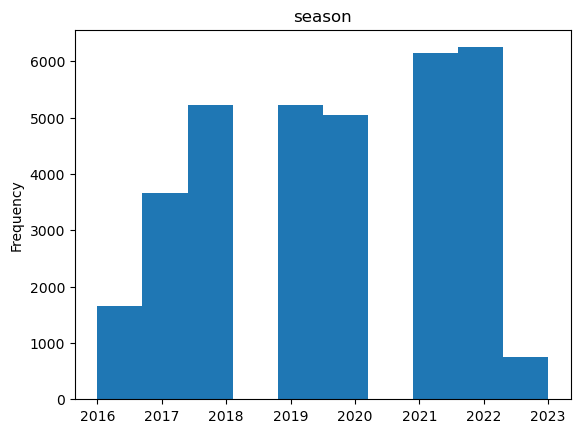

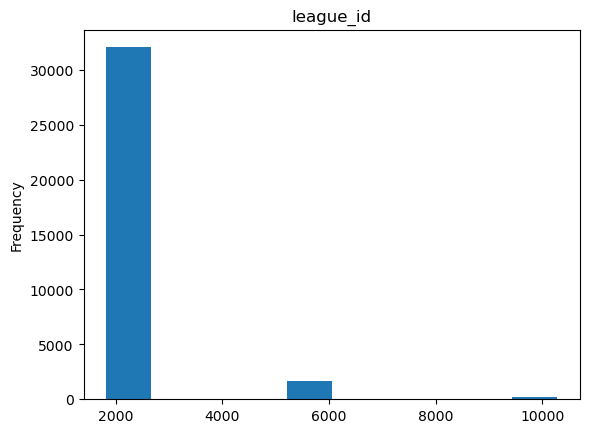

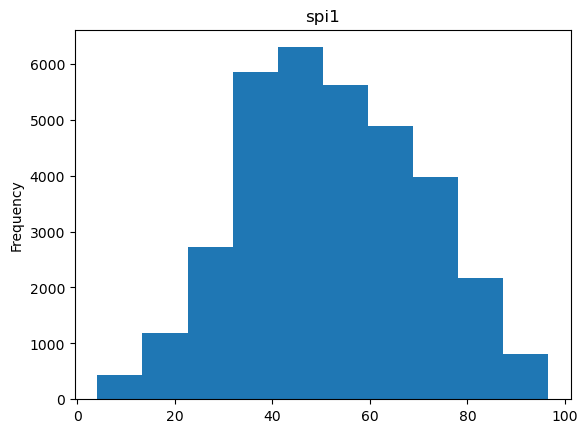

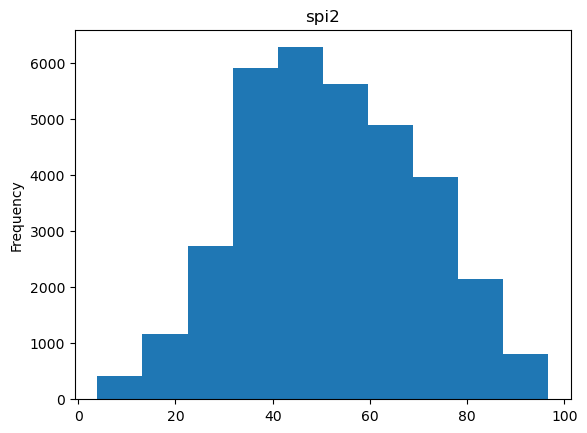

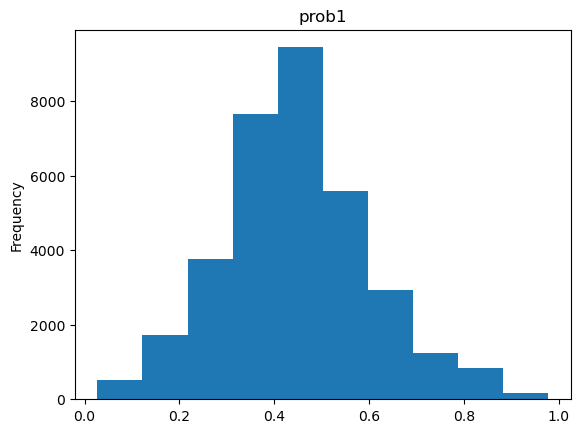

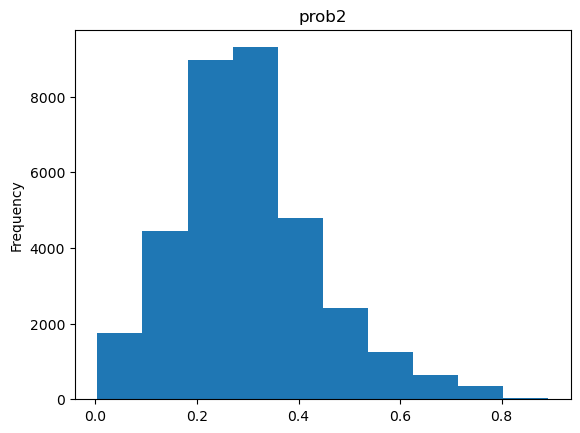

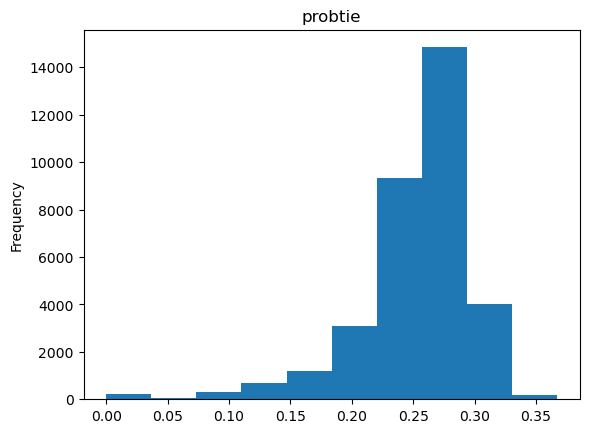

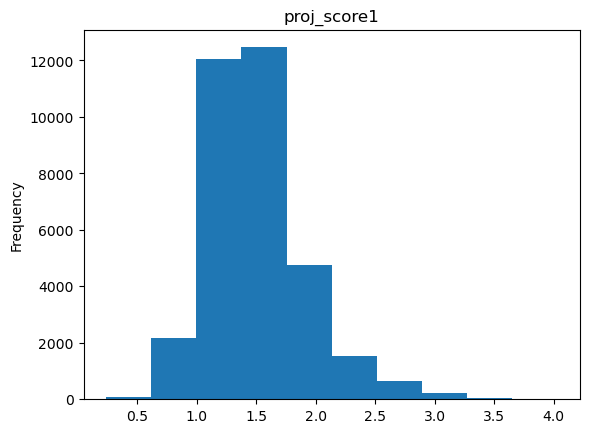

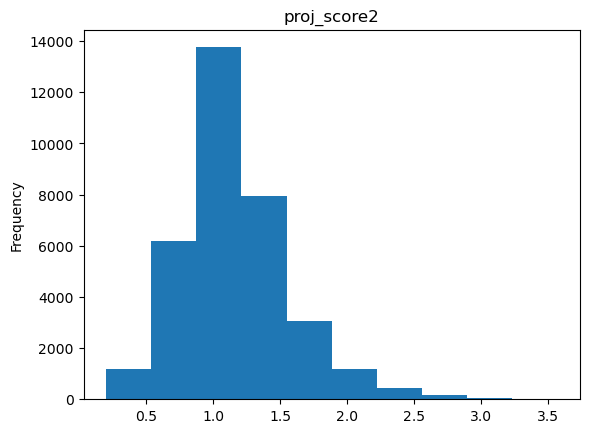

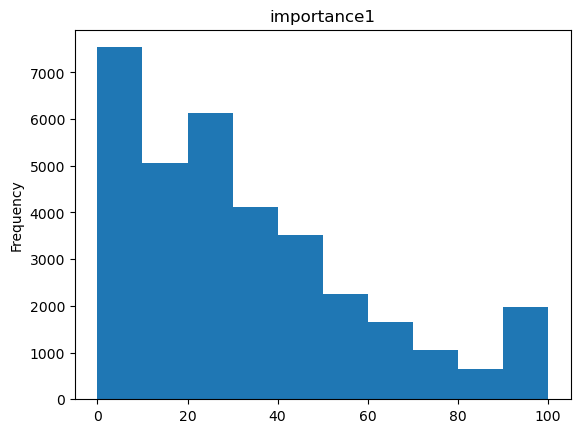

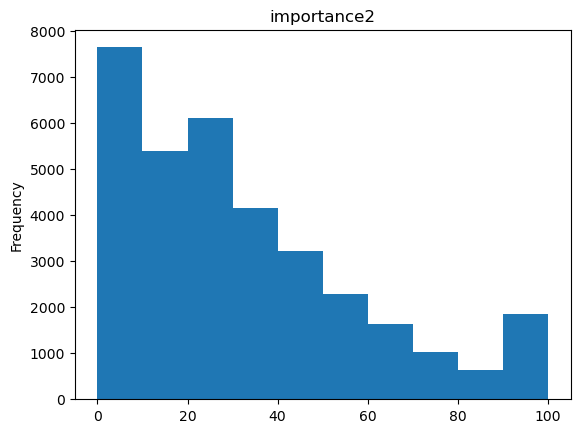

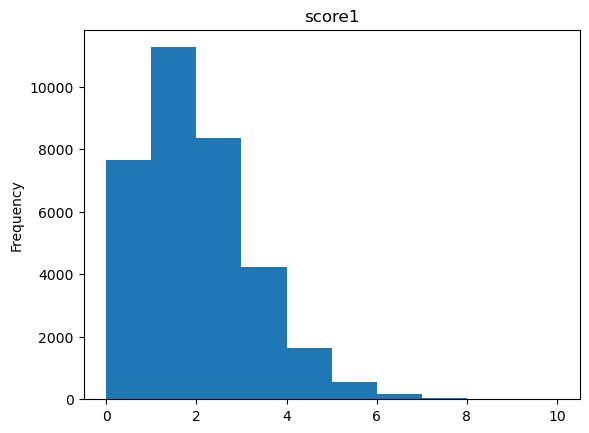

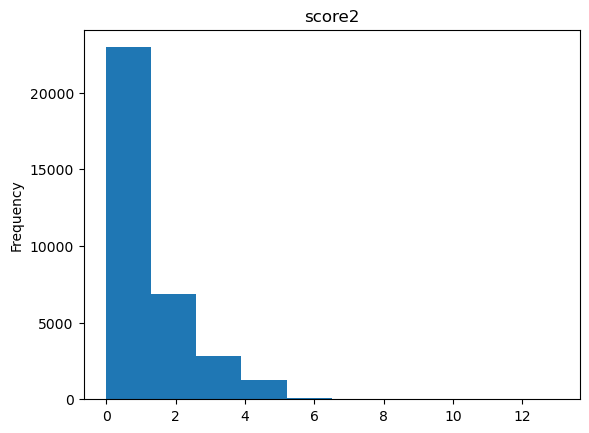

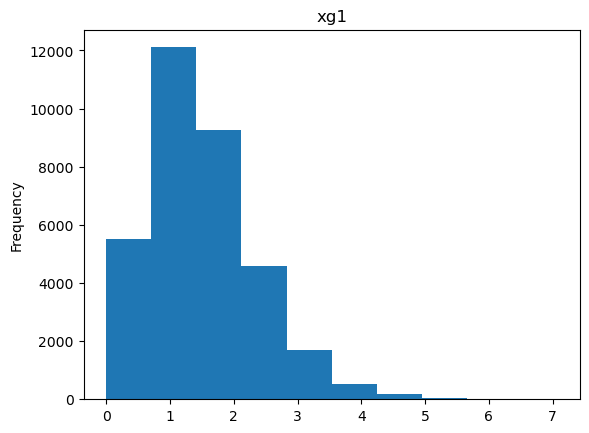

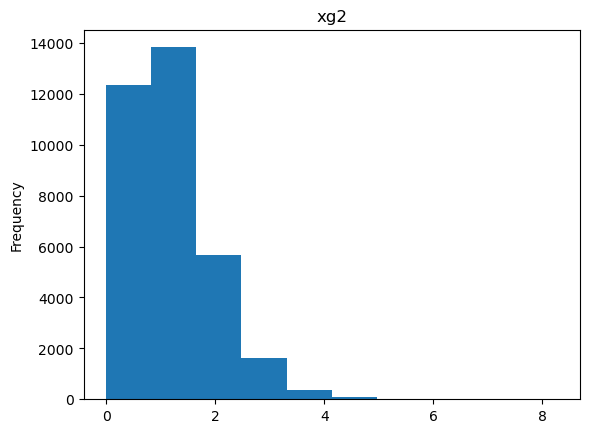

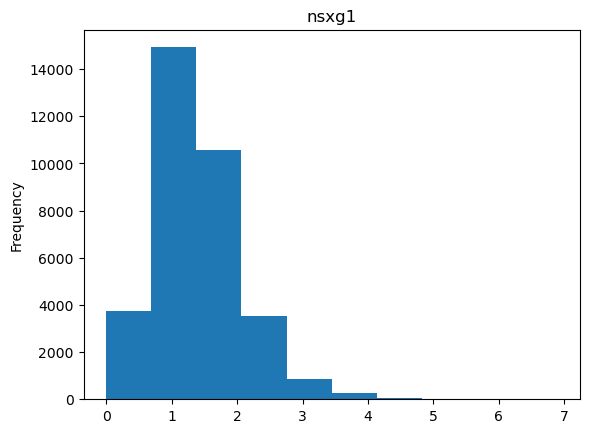

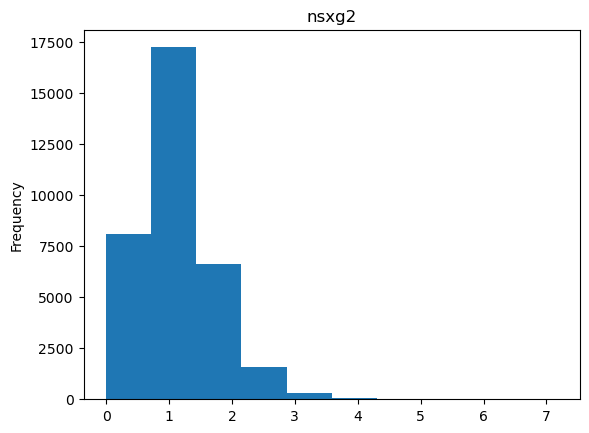

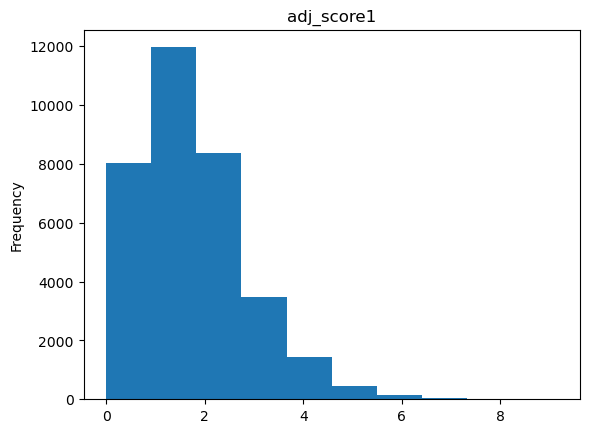

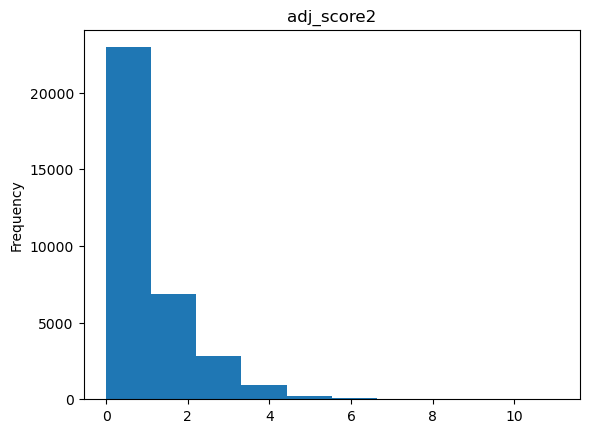

In [345]:
for col in data_num.columns:
    data_num[col].plot(kind='hist')
    plt.title(col)
    plt.show()



<Axes: >

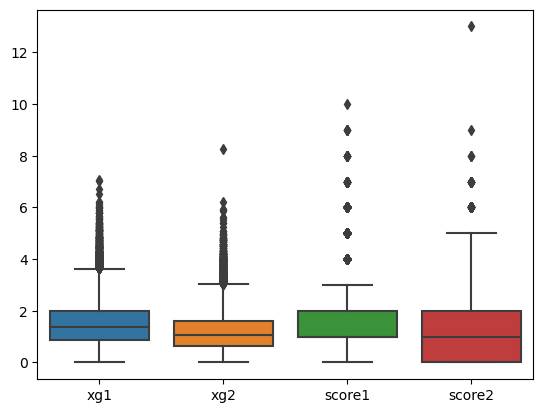

In [346]:
sns.boxplot(data=data_num[['xg1','xg2','score1','score2']])




In [347]:
#  i would like to create two new columns, for xg combined and goals scored combined.

In [348]:
data['xgtotal']= data['xg1'] + data['xg2']
data['xgtotal']

10      1.60
11      3.22
12      3.62
13      1.84
14      1.79
        ... 
3952    3.73
3954    3.54
3959    3.90
3961    2.01
3963    6.01
Name: xgtotal, Length: 33949, dtype: float64

In [349]:
data.shape

(33949, 24)

In [350]:
data['scoretotal']= data['score1'] + data['score2']
data.head()

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,xgtotal,scoretotal
10,2016,2016-08-12,1843,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,...,0,1,0.97,0.63,0.43,0.45,0.00,1.05,1.60,1
11,2016,2016-08-12,1843,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,...,2,2,2.45,0.77,1.75,0.42,2.10,2.10,3.22,4
12,2016,2016-08-13,2411,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,...,2,1,0.85,2.77,0.17,1.25,2.10,1.05,3.62,3
13,2016,2016-08-13,2411,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,...,1,1,0.73,1.11,0.88,1.81,1.05,1.05,1.84,2
14,2016,2016-08-13,2411,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,...,0,1,1.11,0.68,0.84,1.60,0.00,1.05,1.79,1


In [351]:
#  i going to do the same for the nsxg, the 'nonshootingexpectedgoals'(every other variable that is influencing the probability to score)

In [352]:
data['nsxgtotal']=data['nsxg1'] +data['nsxg2']
data.head()

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,xgtotal,scoretotal,nsxgtotal
10,2016,2016-08-12,1843,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,...,1,0.97,0.63,0.43,0.45,0.00,1.05,1.60,1,0.88
11,2016,2016-08-12,1843,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,...,2,2.45,0.77,1.75,0.42,2.10,2.10,3.22,4,2.17
12,2016,2016-08-13,2411,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,...,1,0.85,2.77,0.17,1.25,2.10,1.05,3.62,3,1.42
13,2016,2016-08-13,2411,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,...,1,0.73,1.11,0.88,1.81,1.05,1.05,1.84,2,2.69
14,2016,2016-08-13,2411,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,...,1,1.11,0.68,0.84,1.60,0.00,1.05,1.79,1,2.44


In [353]:
# i want to see which championship has the best xG

In [354]:
mean_xgtotal = data.groupby(['league']).agg({'xgtotal':'mean'})
display(mean_xgtotal)

,xgtotal
league,
Argentina Primera Division,2.417675
Australian A-League,2.994729
Barclays Premier League,2.878866
Brasileiro Série A,2.490358
Chinese Super League,2.685812
Dutch Eredivisie,2.928083
English League Championship,2.424851
FIFA World Cup,3.291250
French Ligue 1,2.675210


In [355]:
mean_xgtotal['xgtotal'].idxmax()

'FIFA World Cup'

In [356]:
# top 5 best xg championships
mean_xgtotal['xgtotal'].nlargest(n=5)

league
FIFA World Cup           3.291250
UEFA Champions League    3.154649
German Bundesliga        3.006434
Australian A-League      2.994729
Dutch Eredivisie         2.928083
Name: xgtotal, dtype: float64

In [357]:
mean_xgtotal['xgtotal'].idxmin()

'Spanish Segunda Division'

In [358]:
# 5 lowest xg championships

In [359]:
mean_xgtotal['xgtotal'].nsmallest(n=5)

league
Spanish Segunda Division       2.396292
Argentina Primera Division     2.417675
English League Championship    2.424851
Brasileiro Série A             2.490358
Italy Serie B                  2.550704
Name: xgtotal, dtype: float64

In [360]:
#  let's see who is missing the most opportunities. From the Xg we should substract the goals

In [361]:
mean_scoretotal = data.groupby(['league']).agg({'scoretotal':'mean'})
mean_scoretotal

,scoretotal
league,
Argentina Primera Division,2.262077
Australian A-League,3.012024
Barclays Premier League,2.771756
Brasileiro Série A,2.342002
Chinese Super League,3.179487
Dutch Eredivisie,2.973856
English League Championship,2.499010
FIFA World Cup,3.250000
French Ligue 1,2.692831


In [362]:
missing_opp =pd.DataFrame(mean_xgtotal['xgtotal'] - mean_scoretotal['scoretotal'], columns =['Difference'])
missing_opp


,Difference
league,
Argentina Primera Division,0.155598
Australian A-League,-0.017295
Barclays Premier League,0.107111
Brasileiro Série A,0.148356
Chinese Super League,-0.493675
Dutch Eredivisie,-0.045773
English League Championship,-0.074158
FIFA World Cup,0.041250
French Ligue 1,-0.017621


In [363]:
missing_opp.idxmax()

Difference    Spanish Segunda Division
dtype: object

In [364]:
# the maximum absolute value will give us the  best team to overperform, scoring more goals than expected

In [365]:
missing_opp.abs().idxmax()

Difference    Chinese Super League
dtype: object

In [366]:
data.head()

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,xgtotal,scoretotal,nsxgtotal
10,2016,2016-08-12,1843,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,...,1,0.97,0.63,0.43,0.45,0.00,1.05,1.60,1,0.88
11,2016,2016-08-12,1843,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,...,2,2.45,0.77,1.75,0.42,2.10,2.10,3.22,4,2.17
12,2016,2016-08-13,2411,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,...,1,0.85,2.77,0.17,1.25,2.10,1.05,3.62,3,1.42
13,2016,2016-08-13,2411,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,...,1,0.73,1.11,0.88,1.81,1.05,1.05,1.84,2,2.69
14,2016,2016-08-13,2411,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,...,1,1.11,0.68,0.84,1.60,0.00,1.05,1.79,1,2.44


In [367]:
data['team1'].nunique()

562

In [368]:
#  i would like to see which team creates the best xg at home, then the worst

In [369]:
xghome = pd.DataFrame(data.groupby(['team1']).agg({'xg1':'sum', 'xg2':'count'}))
xghome.reset_index(inplace=True)
xghome

,team1,xg1,xg2
0,1. FC Heidenheim 1846,138.60,88
1,1. FC Kaiserslautern,36.35,24
2,1. FC Magdeburg,41.41,32
3,1. FC Nürnberg,113.58,89
4,1. FC Union Berlin,151.58,99
...,...,...,...
557,Young Boys,26.31,16
558,Zalgiris Vilnius,2.11,3
559,Zenit St Petersburg,28.00,19
560,Zlín,0.87,2


In [370]:
xghome.columns

Index(['team1', 'xg1', 'xg2'], dtype='object')

In [371]:
# we are going to filter and keep only the team with more than 30 games played

In [372]:
xghome =pd.DataFrame(xghome[xghome.xg2 > 30]).reset_index()

In [373]:
xghome

,index,team1,xg1,xg2
0,0,1. FC Heidenheim 1846,138.60,88
1,2,1. FC Magdeburg,41.41,32
2,3,1. FC Nürnberg,113.58,89
3,4,1. FC Union Berlin,151.58,99
4,6,AC Milan,268.27,151
...,...,...,...,...
365,548,Western Sydney FC,57.71,38
366,549,Western United,61.23,39
367,550,Wigan,82.79,67
368,551,Willem II,37.16,34


In [374]:
(xghome['xg1']/xghome['xg2']).nlargest(n=5)

42     2.768621
10     2.608533
253    2.605333
205    2.565123
39     2.461090
dtype: float64

In [375]:
xghome.iloc[[10,42,253,205,39]]

,index,team1,xg1,xg2
10,17,Ajax,195.64,75
42,66,Bayern Munich,401.45,145
253,376,Paris Saint-Germain,390.80,150
205,314,Manchester City,415.55,162
39,60,Barcelona,383.93,156


In [376]:
(xghome['xg1']/xghome['xg2']).nsmallest(n=5)

175    0.810882
54     0.888824
358    0.939535
349    0.980270
168    0.992692
dtype: float64

In [377]:
xghome.iloc[[175,54,358,349,168]]

,index,team1,xg1,xg2
175,264,Ipswich Town,27.57,34
54,81,Bolton,30.22,34
358,539,Vitoria Setubal,40.40,43
349,526,Veracruz,36.27,37
168,256,Huddersfield Town,129.05,130


In [378]:
# now i would like to see if the xg is somehow weather dependent, if the pitches are now better wit undersoil heating etc

In [379]:
data_weather = data.copy()

In [380]:
data_weather

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,xgtotal,scoretotal,nsxgtotal
10,2016,2016-08-12,1843,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,...,1,0.97,0.63,0.43,0.45,0.00,1.05,1.60,1,0.88
11,2016,2016-08-12,1843,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,...,2,2.45,0.77,1.75,0.42,2.10,2.10,3.22,4,2.17
12,2016,2016-08-13,2411,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,...,1,0.85,2.77,0.17,1.25,2.10,1.05,3.62,3,1.42
13,2016,2016-08-13,2411,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,...,1,0.73,1.11,0.88,1.81,1.05,1.05,1.84,2,2.69
14,2016,2016-08-13,2411,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,...,1,1.11,0.68,0.84,1.60,0.00,1.05,1.79,1,2.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3952,2022,2022-12-10,1908,FIFA World Cup,England,France,87.59,87.53,0.5160,0.4840,...,2,2.43,1.30,1.52,1.33,1.05,2.10,3.73,3,2.85
3954,2022,2022-12-13,1908,FIFA World Cup,Argentina,Croatia,87.46,79.37,0.6426,0.3574,...,0,3.01,0.53,1.14,1.07,3.15,0.00,3.54,3,2.21
3959,2022,2022-12-14,1908,FIFA World Cup,France,Morocco,87.72,75.13,0.6646,0.3354,...,0,2.60,1.30,1.35,0.93,1.87,0.00,3.90,2,2.28
3961,2022,2022-12-17,1908,FIFA World Cup,Croatia,Morocco,77.65,73.92,0.5325,0.4675,...,1,0.70,1.31,1.47,0.66,2.10,1.05,2.01,3,2.13


In [381]:
data_weather["date"] = pd.to_datetime(data_weather["date"])

In [382]:
data_weather['year']= data_weather['date'].dt.year
data_weather['month']= data_weather['date'].dt.month
data_weather['day']= data_weather['date'].dt.day


In [383]:
data_weather.head()

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,nsxg1,nsxg2,adj_score1,adj_score2,xgtotal,scoretotal,nsxgtotal,year,month,day
10,2016,2016-08-12,1843,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,...,0.43,0.45,0.00,1.05,1.60,1,0.88,2016,8,12
11,2016,2016-08-12,1843,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,...,1.75,0.42,2.10,2.10,3.22,4,2.17,2016,8,12
12,2016,2016-08-13,2411,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,...,0.17,1.25,2.10,1.05,3.62,3,1.42,2016,8,13
13,2016,2016-08-13,2411,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,...,0.88,1.81,1.05,1.05,1.84,2,2.69,2016,8,13
14,2016,2016-08-13,2411,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,...,0.84,1.60,0.00,1.05,1.79,1,2.44,2016,8,13


In [384]:
check_months = pd.DataFrame(data_weather.pivot_table(index= ['month'], columns = ['league'], values = ['xgtotal'], aggfunc = ['mean']))

In [385]:
check_months

mean                                              \
                          xgtotal                                               
league Argentina Primera Division Australian A-League Barclays Premier League   
month                                                                           
1                        2.347292            2.995000                2.769850   
2                        2.400990            3.067692                2.873457   
3                        2.516566            2.980145                2.875327   
4                        2.437712            3.256750                2.873379   
5                        2.537674            2.839286                3.083196   
6                        2.249259            3.397143                2.249200   
7                        2.490263            2.425833                2.993636   
8                        2.225918            2.592500                2.797391   
9                        2.374493                 NaN                2.972698   
10                       2.412146            2.899677                2.864000   
11                       2.423596            3.337429                2.945536   
12                       2.690532            2.694590                2.830668   

                                                                 \
                                                                  
league Brasileiro Série A Chinese Super League Dutch Eredivisie   
month                                                             
1                2.647288                  NaN         2.760776   
2                2.528113                  NaN         2.943491   
3                     NaN             2.868750         2.989375   
4                2.627717             2.447097         2.872449   
5                2.507358             2.628065         3.146923   
6                2.490570             2.342188              NaN   
7                2.551703             2.870976              NaN   
8                2.324871             2.566607         3.005738   
9                2.438735             2.561739         2.873596   
10               2.528110             2.867805         2.951364   
11               2.478303             2.953673         2.834430   
12               2.522087                  NaN         2.934933   

                                                                  \
                                                                   
league English League Championship FIFA World Cup French Ligue 1   
month                                                              
1                         2.369439            NaN       2.591912   
2                         2.445036            NaN       2.586012   
3                         2.354829            NaN       2.620837   
4                         2.599846            NaN       2.816679   
5                         2.550481            NaN       2.888082   
6                         2.045667            NaN       3.293000   
7                         2.359670            NaN            NaN   
8                         2.407920            NaN       2.691295   
9                         2.351396            NaN       2.599135   
10                        2.412692            NaN       2.657826   
11                        2.439520            NaN       2.665759   
12                        2.380773        3.29125       2.639919   

                             ...                      \
                             ...                       
league German 2. Bundesliga  ... Major League Soccer   
month                        ...                       
1                  2.676293  ...                 NaN   
2                  2.960588  ...            2.804286   
3                  2.899290  ...            2.808221   
4                  2.879628  ...            2.781564   
5                  2.987971  ...            2.826276   
6                  2.798205  ...            2.767595   
7         

In [386]:
check_months.idxmax()

               league                                  
mean  xgtotal  Argentina Primera Division                  12
               Australian A-League                          6
               Barclays Premier League                      5
               Brasileiro Série A                           1
               Chinese Super League                        11
               Dutch Eredivisie                             5
               English League Championship                  4
               FIFA World Cup                              12
               French Ligue 1                               6
               German 2. Bundesliga                         5
               German Bundesliga                            5
               Italy Serie A                                6
               Italy Serie B                                5
               Major League Soccer                         10
               Mexican Primera Division Torneo Apertura    10
              

In [387]:
#  i would like to see how many times the team with the bigger XG actually lost the game

In [388]:
host_losing = pd.DataFrame(data[(data['xg1'] > data['xg2']) & (data['score1'] < data['score2'])])
host_losing.head()

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,xgtotal,scoretotal,nsxgtotal
10,2016,2016-08-12,1843,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,...,1,0.97,0.63,0.43,0.45,0.00,1.05,1.60,1,0.88
14,2016,2016-08-13,2411,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,...,1,1.11,0.68,0.84,1.60,0.00,1.05,1.79,1,2.44
39,2016,2016-08-20,2411,Barclays Premier League,West Bromwich Albion,Everton,59.64,67.51,0.3696,0.3491,...,2,2.12,1.95,1.76,2.14,1.05,2.10,4.07,3,3.90
52,2016,2016-08-21,2411,Barclays Premier League,Sunderland,Middlesbrough,54.83,56.24,0.4393,0.2722,...,2,1.58,0.80,2.23,1.04,1.05,2.10,2.38,3,3.27
69,2016,2016-08-22,1869,Spanish Primera Division,Valencia,Las Palmas,77.23,62.90,0.6235,0.1562,...,4,1.31,1.26,2.38,0.51,2.10,3.75,2.57,6,2.89


In [389]:
host_losing.shape

(3306, 26)

In [390]:
guest_losing = pd.DataFrame(data[(data['xg1'] < data['xg2']) & (data['score1'] > data['score2'])])
guest_losing.head()

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,xgtotal,scoretotal,nsxgtotal
12,2016,2016-08-13,2411,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,...,1,0.85,2.77,0.17,1.25,2.10,1.05,3.62,3,1.42
18,2016,2016-08-13,1843,French Ligue 1,Bordeaux,St Etienne,62.01,64.92,0.4232,0.2764,...,2,1.03,1.84,1.10,2.26,3.12,2.10,2.87,5,3.36
27,2016,2016-08-14,1843,French Ligue 1,Nice,Stade Rennes,56.70,53.62,0.4750,0.2298,...,0,0.71,1.30,0.33,1.54,1.05,0.00,2.01,1,1.87
35,2016,2016-08-20,2411,Barclays Premier League,Burnley,Liverpool,57.85,78.87,0.2079,0.5520,...,0,0.21,1.19,0.33,2.36,2.10,0.00,1.40,2,2.69
47,2016,2016-08-20,1843,French Ligue 1,Stade Rennes,AS Nancy Lorraine,54.11,52.57,0.4221,0.2762,...,0,0.45,1.00,0.75,0.93,1.84,0.00,1.45,2,1.68


In [391]:
guest_losing.shape

(3054, 26)

In [392]:
data.shape

(33949, 26)

In [393]:
# hypothesis testing: Is the mean XG equal to the mean of goals scored?

In [394]:
data.head()

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,xgtotal,scoretotal,nsxgtotal
10,2016,2016-08-12,1843,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,...,1,0.97,0.63,0.43,0.45,0.00,1.05,1.60,1,0.88
11,2016,2016-08-12,1843,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,...,2,2.45,0.77,1.75,0.42,2.10,2.10,3.22,4,2.17
12,2016,2016-08-13,2411,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,...,1,0.85,2.77,0.17,1.25,2.10,1.05,3.62,3,1.42
13,2016,2016-08-13,2411,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,...,1,0.73,1.11,0.88,1.81,1.05,1.05,1.84,2,2.69
14,2016,2016-08-13,2411,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,...,1,1.11,0.68,0.84,1.60,0.00,1.05,1.79,1,2.44


In [395]:
data['scoretotal'].mean()

2.6993136763969483

In [396]:
#H0: mean Xg value = 2.69
#H1: mean cholesterol value <> 2.69

In [397]:
from scipy.stats import ttest_1samp


In [398]:
list_xgtotal = data['xgtotal'].tolist()


In [399]:
stat, pval = ttest_1samp(list_xgtotal, 2.69)
print('stat is  ', stat)
print('pvalue for the two-tailed test is ', pval)




stat is   1.7810568115340404
pvalue for the two-tailed test is  0.0749121090261755


In [400]:
# p value > 0.05 so we cannot reject the HO

In [401]:
#prediction model

In [402]:
data.head()

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,xgtotal,scoretotal,nsxgtotal
10,2016,2016-08-12,1843,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,...,1,0.97,0.63,0.43,0.45,0.00,1.05,1.60,1,0.88
11,2016,2016-08-12,1843,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,...,2,2.45,0.77,1.75,0.42,2.10,2.10,3.22,4,2.17
12,2016,2016-08-13,2411,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,...,1,0.85,2.77,0.17,1.25,2.10,1.05,3.62,3,1.42
13,2016,2016-08-13,2411,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,...,1,0.73,1.11,0.88,1.81,1.05,1.05,1.84,2,2.69
14,2016,2016-08-13,2411,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,...,1,1.11,0.68,0.84,1.60,0.00,1.05,1.79,1,2.44


In [403]:
data.shape

(33949, 26)

In [404]:
data.columns

Index(['season', 'date', 'league_id', 'league', 'team1', 'team2', 'spi1',
       'spi2', 'prob1', 'prob2', 'probtie', 'proj_score1', 'proj_score2',
       'importance1', 'importance2', 'score1', 'score2', 'xg1', 'xg2', 'nsxg1',
       'nsxg2', 'adj_score1', 'adj_score2', 'xgtotal', 'scoretotal',
       'nsxgtotal'],
      dtype='object')

In [405]:
data['team1'].value_counts()

AS Roma              164
Sevilla FC           163
Liverpool            163
Manchester United    162
Chelsea              162
                    ... 
Zlín                   2
Croatia                2
Japan                  1
Brazil                 1
Portugal               1
Name: team1, Length: 562, dtype: int64

In [406]:
data.shape

(33949, 26)

In [407]:
counts = data['team1'].value_counts()

res = data[~data['team1'].isin(counts[counts < 80].index)]
res

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,xgtotal,scoretotal,nsxgtotal
11,2016,2016-08-12,1843,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,...,2,2.45,0.77,1.75,0.42,2.10,2.10,3.22,4,2.17
12,2016,2016-08-13,2411,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,...,1,0.85,2.77,0.17,1.25,2.10,1.05,3.62,3,1.42
13,2016,2016-08-13,2411,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,...,1,0.73,1.11,0.88,1.81,1.05,1.05,1.84,2,2.69
14,2016,2016-08-13,2411,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,...,1,1.11,0.68,0.84,1.60,0.00,1.05,1.79,1,2.44
15,2016,2016-08-13,2411,Barclays Premier League,Middlesbrough,Stoke City,56.32,60.35,0.4380,0.2692,...,1,1.40,0.55,1.13,1.06,1.05,1.05,1.95,2,2.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67502,2023,2023-06-11,2105,Brasileiro Série A,São Paulo,Palmeiras,58.24,69.47,0.3065,0.4323,...,2,1.28,0.73,2.68,0.81,0.00,1.91,2.01,2,3.49
67503,2023,2023-06-11,2105,Brasileiro Série A,Internacional,Vasco da Gama,54.14,51.08,0.4909,0.2551,...,1,1.73,1.23,1.28,1.09,2.10,1.05,2.96,3,2.37
67504,2022,2023-06-11,1871,Spanish Segunda Division,Alavés,Levante,38.97,42.66,0.3994,0.2719,...,0,0.31,0.79,1.14,0.71,0.00,0.00,1.10,0,1.85
67505,2023,2023-06-11,2105,Brasileiro Série A,Flamengo,Grêmio,67.58,45.74,0.7325,0.1037,...,0,2.70,1.99,1.64,3.57,2.63,0.00,4.69,3,5.21


In [408]:
res.shape

(22508, 26)

In [409]:
res['team1'].value_counts()

AS Roma                164
Liverpool              163
Sevilla FC             163
Real Madrid            162
Manchester City        162
                      ... 
Las Palmas              81
Sheffield Wednesday     81
Barnsley                81
Girona FC               80
SD Huesca               80
Name: team1, Length: 193, dtype: int64

In [410]:
counts = res['team2'].value_counts()

res = res[~res['team2'].isin(counts[counts < 80].index)]
res

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,xgtotal,scoretotal,nsxgtotal
12,2016,2016-08-13,2411,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,...,1,0.85,2.77,0.17,1.25,2.10,1.05,3.62,3,1.42
13,2016,2016-08-13,2411,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,...,1,0.73,1.11,0.88,1.81,1.05,1.05,1.84,2,2.69
14,2016,2016-08-13,2411,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,...,1,1.11,0.68,0.84,1.60,0.00,1.05,1.79,1,2.44
15,2016,2016-08-13,2411,Barclays Premier League,Middlesbrough,Stoke City,56.32,60.35,0.4380,0.2692,...,1,1.40,0.55,1.13,1.06,1.05,1.05,1.95,2,2.19
16,2016,2016-08-13,2411,Barclays Premier League,Southampton,Watford,69.49,59.33,0.5759,0.1874,...,1,1.05,0.22,1.52,0.41,1.05,1.05,1.27,2,1.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67469,2023,2023-06-10,1951,Major League Soccer,Chicago Fire,Columbus Crew,36.93,43.49,0.4352,0.3083,...,2,0.67,1.04,0.44,1.35,1.05,2.10,1.71,3,1.79
67474,2023,2023-06-10,1951,Major League Soccer,Real Salt Lake,New York City FC,32.97,45.77,0.3687,0.3507,...,0,2.78,0.31,1.30,0.69,0.00,0.00,3.09,0,1.99
67477,2023,2023-06-10,1951,Major League Soccer,San Jose Earthquakes,Philadelphia Union,38.60,53.29,0.3595,0.3820,...,1,0.47,1.78,1.10,2.30,2.10,1.05,2.25,3,3.40
67504,2022,2023-06-11,1871,Spanish Segunda Division,Alavés,Levante,38.97,42.66,0.3994,0.2719,...,0,0.31,0.79,1.14,0.71,0.00,0.00,1.10,0,1.85


In [411]:
res['team2'].value_counts()

Liverpool            155
Manchester City      153
Manchester United    150
Chelsea              149
Tottenham Hotspur    144
                    ... 
Strasbourg            83
Guadalajara           83
Puebla                82
Necaxa                82
Luton Town            80
Name: team2, Length: 137, dtype: int64

In [412]:
res.shape

(14970, 26)

In [413]:
res.columns

Index(['season', 'date', 'league_id', 'league', 'team1', 'team2', 'spi1',
       'spi2', 'prob1', 'prob2', 'probtie', 'proj_score1', 'proj_score2',
       'importance1', 'importance2', 'score1', 'score2', 'xg1', 'xg2', 'nsxg1',
       'nsxg2', 'adj_score1', 'adj_score2', 'xgtotal', 'scoretotal',
       'nsxgtotal'],
      dtype='object')

In [414]:
data_model = res.filter(['league_id', 'team1', 'team2', 'spi1', 'spi2', 'prob1', 'prob2','proj_score1', 'proj_score2', 'importance1', 'importance2', 'score1','score2','scoretotal'], axis=1)

In [415]:
data_model.columns

Index(['league_id', 'team1', 'team2', 'spi1', 'spi2', 'prob1', 'prob2',
       'proj_score1', 'proj_score2', 'importance1', 'importance2', 'score1',
       'score2', 'scoretotal'],
      dtype='object')

In [416]:
data_model.head()

,league_id,team1,team2,spi1,spi2,prob1,prob2,proj_score1,proj_score2,importance1,importance2,score1,score2,scoretotal
12,2411,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,1.16,1.24,38.1,22.2,2,1,3
13,2411,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,1.47,1.38,31.9,48.0,1,1,2
14,2411,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,1.35,1.14,43.6,34.6,0,1,1
15,2411,Middlesbrough,Stoke City,56.32,60.35,0.4380,0.2692,1.30,1.01,33.9,32.5,1,1,2
16,2411,Southampton,Watford,69.49,59.33,0.5759,0.1874,1.91,1.05,34.1,30.7,1,1,2


In [417]:
data_score1 = pd.DataFrame(data_model.groupby(['team1'])['score1'].mean()).reset_index()

In [418]:
data_score1.columns = ['team1', 'mean_score1']
data_score1

,team1,mean_score1
0,1. FC Heidenheim 1846,1.666667
1,1. FC Nürnberg,0.761905
2,1. FC Union Berlin,1.587302
3,AC Milan,1.440367
4,AFC Bournemouth,1.480620
...,...,...
171,Watford,1.382812
172,Werder Bremen,1.293478
173,West Bromwich Albion,1.457364
174,West Ham United,1.488722


In [419]:
data_intermed = data_model.merge(data_score1, how="inner", on="team1")
data_intermed

,league_id,team1,team2,spi1,spi2,prob1,prob2,proj_score1,proj_score2,importance1,importance2,score1,score2,scoretotal,mean_score1
0,2411,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,1.16,1.24,38.1,22.2,2,1,3,1.212121
1,2411,Hull City,Manchester United,54.79,81.23,0.1750,0.5752,0.89,1.64,26.7,54.9,0,1,1,1.212121
2,2411,Hull City,Arsenal,53.80,81.95,0.1705,0.5894,0.90,1.74,27.7,65.3,1,4,5,1.212121
3,2411,Hull City,Chelsea,50.28,79.83,0.1539,0.6221,0.95,1.87,36.5,59.5,0,2,2,1.212121
4,2411,Hull City,Stoke City,45.85,57.95,0.3652,0.3459,1.22,1.26,53.3,41.8,0,2,2,1.212121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14965,2412,Luton Town,Swansea City,51.41,45.67,0.5231,0.2278,1.63,0.98,30.4,3.7,1,0,1,1.229730
14966,2412,Luton Town,Bristol City,52.25,43.62,0.5415,0.1926,1.48,0.77,27.0,2.7,1,0,1,1.229730
14967,2412,Luton Town,Watford,52.76,47.95,0.4786,0.2405,1.35,0.87,20.5,19.7,2,0,2,1.229730
14968,2412,Luton Town,Middlesbrough,56.49,57.17,0.4425,0.3002,1.50,1.19,30.1,29.9,2,1,3,1.229730


In [420]:
data_score2 = pd.DataFrame(data_model.groupby(['team2'])['score2'].mean()).reset_index()
data_score2.columns = ['team2', 'mean_score2']
data_score2

,team2,mean_score2
0,1. FC Union Berlin,1.174419
1,AC Milan,1.552000
2,AFC Bournemouth,1.149254
3,AS Monaco,1.570000
4,AS Roma,1.488372
...,...,...
132,Watford,0.890625
133,Werder Bremen,1.490909
134,West Bromwich Albion,1.030769
135,West Ham United,1.237037


In [421]:
data_model = data_intermed.merge(data_score2, how="inner", on="team2")
data_model

,league_id,team1,team2,spi1,spi2,prob1,prob2,proj_score1,proj_score2,importance1,importance2,score1,score2,scoretotal,mean_score1,mean_score2
0,2411,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,1.16,1.24,38.1,22.2,2,1,3,1.212121,1.507463
1,2411,Everton,Leicester City,73.84,61.57,0.6057,0.1609,1.86,0.92,2.4,0.6,4,2,6,1.409091,1.507463
2,2411,Everton,Leicester City,56.48,66.05,0.3458,0.3776,1.30,1.37,8.1,0.1,2,1,3,1.409091,1.507463
3,2411,Everton,Leicester City,71.13,70.90,0.4552,0.2662,1.50,1.08,1.2,0.9,0,1,1,1.409091,1.507463
4,2411,Everton,Leicester City,78.42,81.32,0.3182,0.4020,1.13,1.31,1.9,46.5,2,1,3,1.409091,1.507463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14965,1975,Toluca,Cruz Azul,50.53,49.02,0.4498,0.2647,1.43,1.03,32.5,32.7,1,1,2,1.746479,1.139535
14966,1975,Toluca,Cruz Azul,39.01,54.40,0.2942,0.4345,1.17,1.47,23.8,27.9,3,3,6,1.746479,1.139535
14967,1952,Toluca,Cruz Azul,37.28,55.94,0.2682,0.4844,1.25,1.75,40.2,13.1,2,0,2,1.746479,1.139535
14968,1975,Toluca,Cruz Azul,40.08,57.16,0.2721,0.4742,1.15,1.59,21.9,14.9,1,4,5,1.746479,1.139535


In [422]:
data_model=data_model.drop(['score1','score2'], axis=1)
data_model

,league_id,team1,team2,spi1,spi2,prob1,prob2,proj_score1,proj_score2,importance1,importance2,scoretotal,mean_score1,mean_score2
0,2411,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,1.16,1.24,38.1,22.2,3,1.212121,1.507463
1,2411,Everton,Leicester City,73.84,61.57,0.6057,0.1609,1.86,0.92,2.4,0.6,6,1.409091,1.507463
2,2411,Everton,Leicester City,56.48,66.05,0.3458,0.3776,1.30,1.37,8.1,0.1,3,1.409091,1.507463
3,2411,Everton,Leicester City,71.13,70.90,0.4552,0.2662,1.50,1.08,1.2,0.9,1,1.409091,1.507463
4,2411,Everton,Leicester City,78.42,81.32,0.3182,0.4020,1.13,1.31,1.9,46.5,3,1.409091,1.507463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14965,1975,Toluca,Cruz Azul,50.53,49.02,0.4498,0.2647,1.43,1.03,32.5,32.7,2,1.746479,1.139535
14966,1975,Toluca,Cruz Azul,39.01,54.40,0.2942,0.4345,1.17,1.47,23.8,27.9,6,1.746479,1.139535
14967,1952,Toluca,Cruz Azul,37.28,55.94,0.2682,0.4844,1.25,1.75,40.2,13.1,2,1.746479,1.139535
14968,1975,Toluca,Cruz Azul,40.08,57.16,0.2721,0.4742,1.15,1.59,21.9,14.9,5,1.746479,1.139535


C:\Users\sorig\AppData\Local\Temp\ipykernel_1376\1677210863.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=data_model.corr()


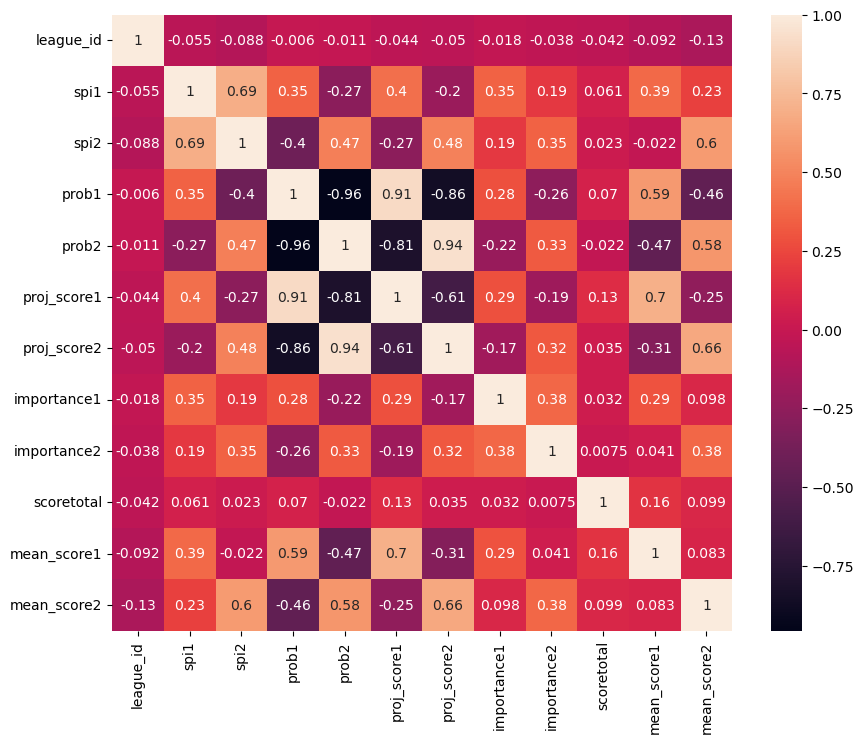

In [423]:
corr_matrix=data_model.corr() 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [424]:
data_model =data_model.drop(['proj_score1','proj_score2'], axis=1)
data_model

,league_id,team1,team2,spi1,spi2,prob1,prob2,importance1,importance2,scoretotal,mean_score1,mean_score2
0,2411,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,38.1,22.2,3,1.212121,1.507463
1,2411,Everton,Leicester City,73.84,61.57,0.6057,0.1609,2.4,0.6,6,1.409091,1.507463
2,2411,Everton,Leicester City,56.48,66.05,0.3458,0.3776,8.1,0.1,3,1.409091,1.507463
3,2411,Everton,Leicester City,71.13,70.90,0.4552,0.2662,1.2,0.9,1,1.409091,1.507463
4,2411,Everton,Leicester City,78.42,81.32,0.3182,0.4020,1.9,46.5,3,1.409091,1.507463
...,...,...,...,...,...,...,...,...,...,...,...,...
14965,1975,Toluca,Cruz Azul,50.53,49.02,0.4498,0.2647,32.5,32.7,2,1.746479,1.139535
14966,1975,Toluca,Cruz Azul,39.01,54.40,0.2942,0.4345,23.8,27.9,6,1.746479,1.139535
14967,1952,Toluca,Cruz Azul,37.28,55.94,0.2682,0.4844,40.2,13.1,2,1.746479,1.139535
14968,1975,Toluca,Cruz Azul,40.08,57.16,0.2721,0.4742,21.9,14.9,5,1.746479,1.139535


C:\Users\sorig\AppData\Local\Temp\ipykernel_1376\1677210863.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=data_model.corr()


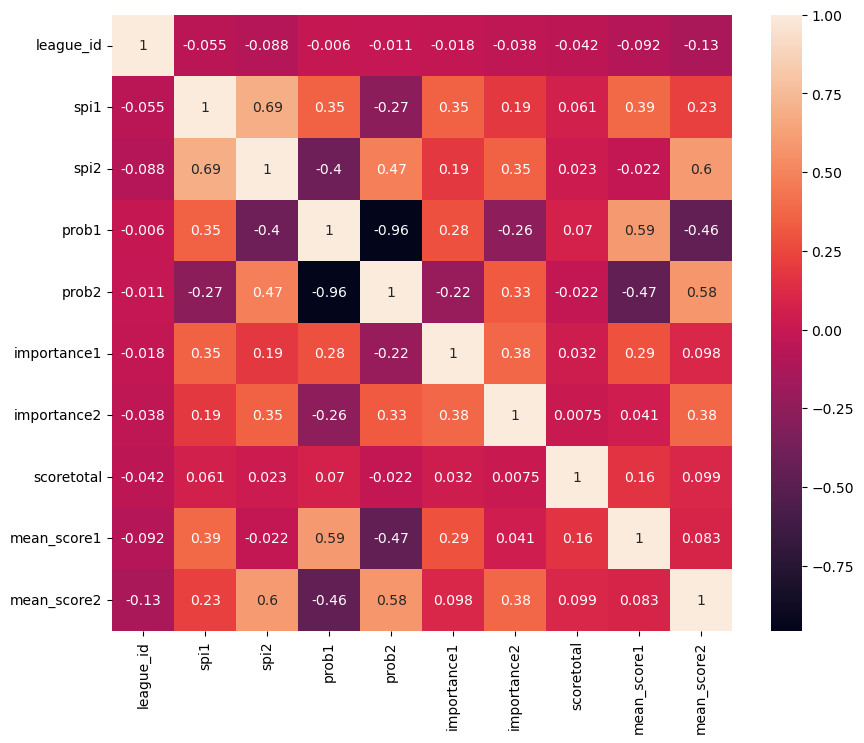

In [425]:
corr_matrix=data_model.corr() 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [427]:
data_model=data_model.drop(['prob1'], axis=1)

In [428]:
y = data_model['scoretotal']
X = data_model.drop('scoretotal', axis=1)


In [429]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)


In [430]:
numericals_train = X_train.select_dtypes(include = np.number)
numericals_test  = X_test.select_dtypes(include = np.number)
categoricals_train = X_train.select_dtypes(include = object)
categoricals_test = X_test.select_dtypes(include = object)


In [431]:
transformer = MinMaxScaler().fit(numericals_train)
numericals_train_standardized_arr = transformer.transform(numericals_train)
numericals_train_standardized = pd.DataFrame(numericals_train_standardized_arr, columns=numericals_train.columns)
numericals_train_standardized.head()


,league_id,spi1,spi2,prob2,importance1,importance2,mean_score1,mean_score2
0,0.018551,0.353755,0.301680,0.271097,1.000,1.000,0.279728,0.208657
1,0.003190,0.435401,0.560982,0.407445,0.256,0.084,0.040237,0.186985
2,0.006026,0.745065,0.648320,0.214114,0.075,0.203,0.233682,0.000000
3,0.070070,0.744681,0.806848,0.547105,0.000,1.000,0.548437,0.462031
4,0.004254,0.517175,0.641990,0.410300,0.005,0.002,0.206161,0.328868


In [432]:
numericals_test_standardized_arr = transformer.transform(numericals_test)
numericals_test_standardized = pd.DataFrame(numericals_test_standardized_arr, columns=numericals_test.columns)
numericals_test_standardized.head()


,league_id,spi1,spi2,prob2,importance1,importance2,mean_score1,mean_score2
0,0.002954,0.355806,0.944832,0.970424,0.481,0.026,0.283823,0.777234
1,0.070070,0.788259,0.586305,0.171063,0.578,0.251,0.548437,0.379429
2,0.015715,0.058703,0.295090,0.560009,0.102,0.183,0.415226,0.412408
3,0.003190,0.594335,0.692119,0.445015,0.271,0.382,0.327085,0.328640
4,0.004254,0.536401,0.548837,0.330478,0.224,0.279,0.242808,0.148352


In [433]:

encoder = OneHotEncoder(drop='first').fit(categoricals_train)
encoded_cat_train = encoder.transform(categoricals_train).toarray()
cols = encoder.get_feature_names_out(input_features=categoricals_train.columns)
onehot_encoded_train = pd.DataFrame(encoded_cat_train, columns=cols)
onehot_encoded_train.head()


,team1_1. FC Nürnberg,team1_1. FC Union Berlin,team1_AC Milan,team1_AFC Bournemouth,team1_AS Monaco,team1_AS Roma,team1_Alavés,team1_Angers,team1_Arminia Bielefeld,team1_Arsenal,...,team2_Vancouver Whitecaps,team2_Verona,team2_VfB Stuttgart,team2_VfL Wolfsburg,team2_Villarreal,team2_Watford,team2_Werder Bremen,team2_West Bromwich Albion,team2_West Ham United,team2_Wolverhampton
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [434]:
encoded_cat_test = encoder.transform(categoricals_test).toarray()
onehot_encoded_test = pd.DataFrame(encoded_cat_test, columns=cols)
onehot_encoded_test.head()


,team1_1. FC Nürnberg,team1_1. FC Union Berlin,team1_AC Milan,team1_AFC Bournemouth,team1_AS Monaco,team1_AS Roma,team1_Alavés,team1_Angers,team1_Arminia Bielefeld,team1_Arsenal,...,team2_Vancouver Whitecaps,team2_Verona,team2_VfB Stuttgart,team2_VfL Wolfsburg,team2_Villarreal,team2_Watford,team2_Werder Bremen,team2_West Bromwich Albion,team2_West Ham United,team2_Wolverhampton
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [435]:
X_train = np.concatenate((numericals_train_standardized, onehot_encoded_train),axis=1)
X_test = np.concatenate((numericals_test_standardized, onehot_encoded_test),axis=1)

In [441]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)


LinearRegression()

In [442]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)


0.06839936537824964

In [443]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)


0.006862351599307481